# Задача 1

Ответ: [ 4.363 -1.296  0.193 -0.008]


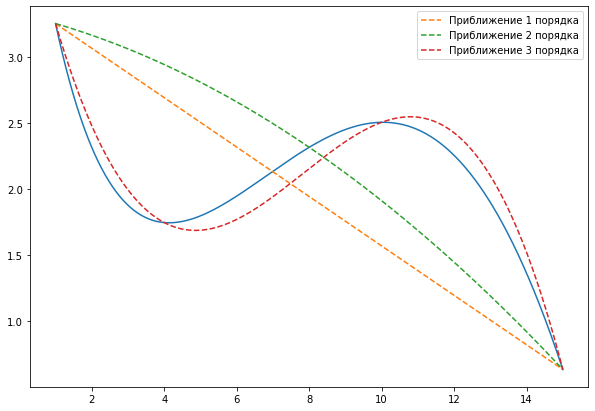

In [130]:
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np

def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

A_1p = [[1, 1], [1, 15]]
b_1p = [f(1), f(15)]
A_2p = [[1, 1, 1], [1, 8, 64], [1, 15, 225]]
b_2p = [f(1), f(8), f(15)]
A_3p = [[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]]
b_3p = [f(1), f(4), f(10), f(15)]

x = np.linspace(1, 15, 1000)
w_1 = LA.solve(A_1p, b_1p)
w_2 = LA.solve(A_2p, b_2p)
w_3 = LA.solve(A_3p, b_3p)
plt.figure(figsize = (10, 7))
plt.plot(x, f(x))
plt.plot(x, x*w_1[1] + w_1[0], '--', label = 'Приближение 1 порядка')
plt.plot(x, x**2*w_2[2] + x*w_2[1] + w_2[0], '--', label = 'Приближение 2 порядка')
plt.plot(x, x**3*w_3[3] + x**2*w_3[2] + x*w_3[1]  + w_3[0], '--', label = 'Приближение 3 порядка')
plt.legend()
print(f'Ответ: {np.around(w_3, decimals = 3)}') 
#Выше выводится 3 знака после запятой, поскольку если выводить 2 - точность сильно падает (из-за коэф-та при 3 степени)

# Задача 2

In [131]:
import numpy as np

def f_2(x: np.array, y: np.array):
    return np.count_nonzero(x*y), np.count_nonzero(np.absolute(x) + np.absolute(y))

def test():
    assert f_2(np.array([1, 0, 1, 1, 0, 1, 1]), np.array([0, 2, 0, 2, 0, 2, 0])) == (2, 6)
    assert f_2(np.array([1, 0, 0, 1, 0, 1, 1]), np.array([0, 2, 0, 2, 0, 2, 0])) == (2, 5)
    assert f_2(np.array([1, 12, 1, 1, 5, -1, 1]), np.array([5, 2, 4, 2, 3, 2, 9])) == (7, 7)
    assert f_2(np.array([0, 0, 0, 0, 0, 0, 0]), np.array([0, 2, 0, 2, 0, 2, 0])) == (0, 3)

if __name__ == "__main__":
    test()

# Задача 3


In [132]:
import numpy as np

def f_3(x: np.array, N: int):
    return np.repeat(x, N)

if __name__ == "__main__":
    print(f_3(np.array([1, 2, 0]), 3))
    print(f_3(np.array([1, 2, 3]), 3))
    print(f_3(np.array([1, 2, 0]), 2))
    print(f_3(np.array([-1, -2, 0]), 5))

[1 1 1 2 2 2 0 0 0]
[1 1 1 2 2 2 3 3 3]
[1 1 2 2 0 0]
[-1 -1 -1 -1 -1 -2 -2 -2 -2 -2  0  0  0  0  0]


# Задача 4

In [136]:
import numpy as np

def f_4(x : np.array):
    ind = np.concatenate([np.array([0]), (np.diff(x) == x[1:]) * 1])
    if len(x[np.nonzero(ind)[0]]):
        return max(x[np.nonzero(ind)[0]])
    else: 
        return 'Нет нулевых элементов!'


if __name__ == "__main__":
    print(f_4(np.array([0, 11, 0, 0, -7, 2, 0, 4, 0])))
    print(f_4(np.array([0, 1, 2, 0, 5, 8, 0, 4, 3])))
    print(f_4(np.array([-1, 1, 2, 2, 5, 8, 2, 4, 3])))
    print(f_4(np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])))

11
5
Нет нулевых элементов!
0
5


# Задача 5

In [171]:
import numpy as np

def f_5(x : np.array):
    matrix = np.arange(len(x))
    matrix[x == 0] = 0
    ind_for_x_changed = np.maximum.accumulate(matrix)
    x_changed = x[ind_for_x_changed]
    return x_changed

if __name__ == "__main__":
    print(f_5(np.array([8, 0, 0, 1, 0, 0, 0, -17.5, 0])))
    print(f_5(np.array([0, 1, 2, 0, 5, 8, 0, 4, 3])))
    print(f_5(np.array([-1, 1, 2, 2, 5, 8, 2, 4, 3])))
    print(f_5(np.array([42, 0, 0, 0, 0, 0, 0, 0, 0])))

[  8.    8.    8.    1.    1.    1.    1.  -17.5 -17.5]
[0 1 2 2 5 8 8 4 3]
[-1  1  2  2  5  8  2  4  3]
[42 42 42 42 42 42 42 42 42]


# Задача 6

In [206]:
import numpy as np

def f_6(x : np.array, n : int):
    f = np.arange(1, n+1)
    return -(np.tile(-x, (1, n))**f/f).sum(axis = 1)

if __name__ == "__main__":
    print(f_6(np.array([0.1]), 5))    # ln(1.1) = 0.0953101798
    print(f_6(np.array([0.1]), 20))   # Этот пример показывает, что при малых х приближение работает с хорошей точностью
    print(f_6(np.array([0.5]), 5))   # ln(1.5) = 0.405465108
    print(f_6(np.array([0.5]), 20))   # А в этом случае нужно гораздо больше членов в сумме для хорошего приближения
    print(f_6(np.array([1]), 100))    # ln(2.0) = 0.69314781 - уже приближение не очень хорошее, хотя 100 слагаемых
    print(f_6(np.array([1.3]), 100))   # После 1 всё ломается полностью, поскольку мы вышли за радиус сходимости ф-ии ln(1+x)

[0.09531033]
[0.09531018]
[0.40729167]
[0.40546509]
[0.68817218]
[-1.39526278e+09]


# Задача 7

In [254]:
import numpy as np

def f_7(A : np.ndarray):
    n = A.shape[0]
    mean_A = np.sum(A, axis = 0)/n
    mA = A - np.tile(mean_A, (n, 1))
    cov_A = np.dot(mA.T, mA)
    return mean_A, cov_A

def test():
    A1 = np.array([[175, 4], [20, 2], [25, 8]])
    A2 = np.array([[10, 4], [-20, 2], [1, 1]])
    A3 = np.array([[10, 4, 7], [-20, 2, -5]])
    A4 = np.array([[1, 5], [-21, 2], [14, 21]])
    print(f_7(A1)) 
    print(f_7(A2)) 
    print(f_7(A3)) 
    print(f_7(A4)) 

if __name__ == "__main__":
    test()

(array([73.33333333,  4.66666667]), array([[15516.66666667,   -86.66666667],
       [  -86.66666667,    18.66666667]]))
(array([-3.        ,  2.33333333]), array([[474.        ,  22.        ],
       [ 22.        ,   4.66666667]]))
(array([-5.,  3.,  1.]), array([[450.,  30., 180.],
       [ 30.,   2.,  12.],
       [180.,  12.,  72.]]))
(array([-2.        ,  9.33333333]), array([[626.        , 313.        ],
       [313.        , 208.66666667]]))
